In [1]:
import json

In [2]:
from ipynb.fs.full.quantumsystem import QuantumSystem, qs

In [3]:
class Location(QuantumSystem.System):
    @classmethod
    def get_location(cls, node_id):
        return json.loads(super().get_relationship(node_id))

    @classmethod
    def set_location(cls, node_id, location):
        QuantumSystem.put(node_id, cls.__name__, location)
        return json.loads(super().get_relationship(node_id))
    
    @classmethod
    def origin(cls):
        return (0, 0, 0)

In [4]:
class Movement(QuantumSystem.System):
    @classmethod
    def has_jump_jets(cls, unit):
        return cls.get_relationship(unit)[-1] == 'j'
    
    @classmethod
    def get_movement_speed(cls, unit):
        movement = cls.get_relationship(unit)
        return int(movement[:-1]) if movement[-1] == 'j' else int(movement)

In [5]:
class MoveSystem(QuantumSystem.HyperSystem):
    systems = [Location, Movement]
    
    @classmethod
    def move(cls, unit, delta):
        movementSpeed = Movement.get_movement_speed(unit)
        startingLocation = Location.get_relationship(unit)
        deltaDistance = sum([d * d for d in delta]) ** 0.5
        assert deltaDistance < movementSpeed, f"Cannot move unit further ({deltaDistance}) than its movement speed ({movementSpeed})"
        newLocation = [sL + lD for sL, lD in zip(json.loads(startingLocation), delta)]
        QuantumSystem.replace(unit, Location, startingLocation, json.dumps(newLocation))

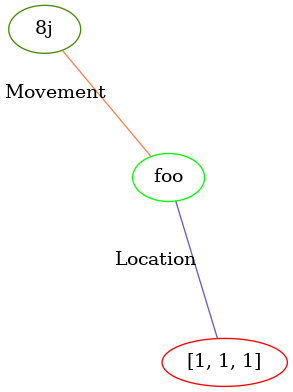

In [6]:
if __name__ == "__main__":
    qs.reset()
    MoveSystem.build_system("foo", [json.dumps([1, 1, 1]), "8j"])
    qs.render()

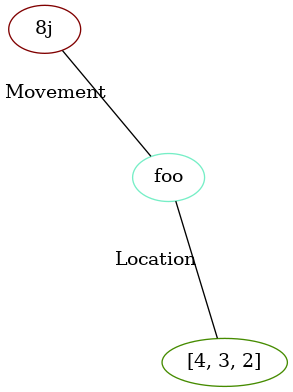

In [7]:
if __name__ == "__main__":
    MoveSystem.move("foo", [3, 2, 1])
    qs.render()